In [1]:
import numpy as np
import scipy.stats
import pylab as plt
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [8, 8]

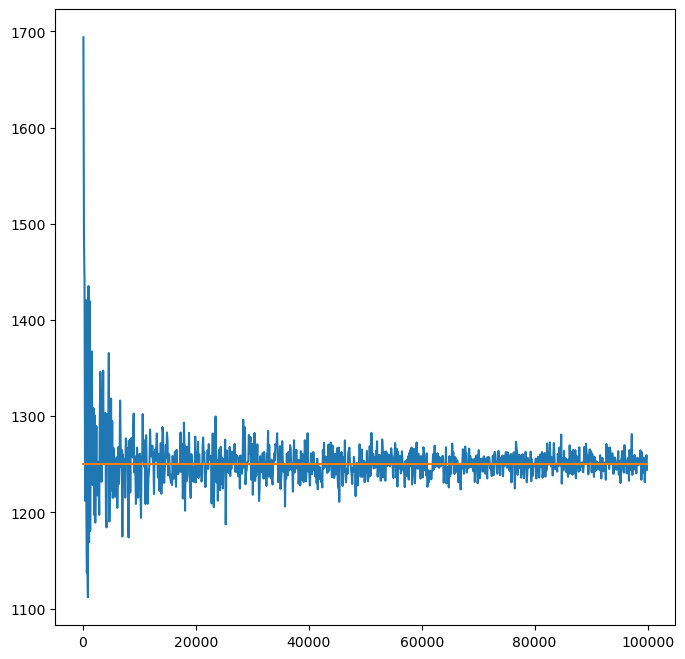

In [2]:
s = 5
distG = scipy.stats.halfnorm(loc =0 , scale=s)
rep = np.arange(100,100000,100)                   #increasing number of repetition
integral = np.zeros(shape = len(rep))
true_value = np.zeros(shape = len(rep))
def f(x,s):                                       #analytic solution
        return x ** 3 * np.sqrt(np.pi/2) * s

for N,i in zip (rep, range(len(rep))):
    x = distG.rvs(N)
    integral[i] = np.mean(f(x,s))
    true_value[i] = 2*s**4                        #expected value
plt.plot(rep, integral)
plt.plot(rep, true_value)

1249.6553855436077 757.4481306737184


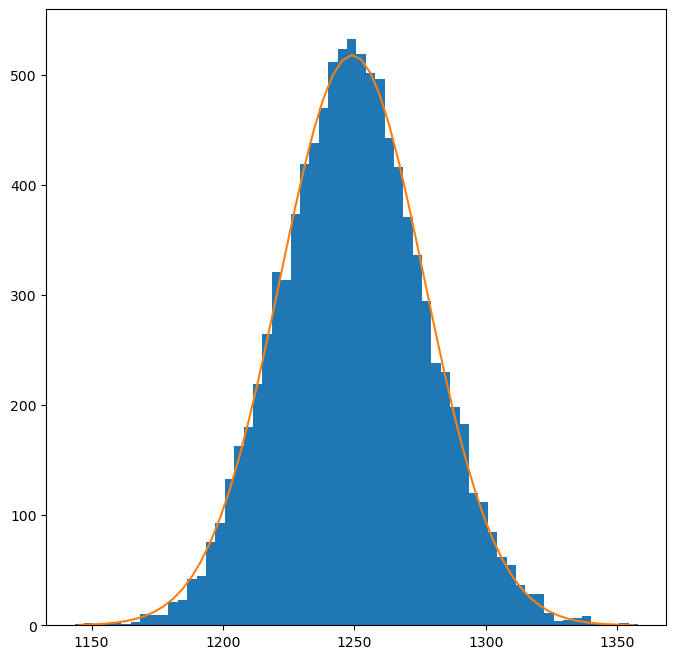

In [3]:
N = 10000
sample = 10000
result = np.zeros(shape = N)
asc = np.zeros(shape = 60)

for i in range(N):                                 #distribution of the integral values
    x = distG.rvs(sample)
    result[i] = np.mean(f(x,s))
counts, bins, bars = plt.hist(result, bins=60)

for i in range(60):
    asc[i] = (bins[i]+bins[i+1])/2

def gaussian(x, A, x0, sigma):
    return A*np.exp(-0.5 * (x-x0)**2 / sigma**2)

params, pcov = curve_fit(
    gaussian, asc, counts, p0=[500, 1250,1], 
)

print(np.mean(result), np.var(result))
plt.plot(asc, gaussian(asc, params[0], params[1], params[2],))